## What is GMPE?

Ground Motion Prediction Equation (GMPE) is an emperical eqaution to quantify the intensity of ground motion caused by an earthquake given some parameter inputs, such as magnitude, distance from the earthquake location to a certain location ($R$), local site characterization in terms of shear wave velocity above 30 m ($Vs_{30}$). The GMPE is often used for seismic hazard analysis. The GMPE is derived from the observation data through a sensor (seismometer or accelerometer) in terms of Peak Ground Velocity (PGV), Peak Ground Acceleration (PGA), Peak Ground Displacement (PGD), and Spectral Acceleration (SA), then the curve fitting is applied againts the distance $R$.

The GMPE has its own characteristics based on the zone of seismic sources and region, either for Active Shallow Crust, Subduction Interface, or Subduction Intraslab that where their extracted from. For an example, there is GMPE governed from the observation data in Japan region. Hence, this GMPE suitible for the region or country that has same characteristics seismic source zone as Japan. Currently, there are more than a hundred GMPEs can be found [here](https://peer.berkeley.edu/sites/default/files/webpeer-2011-102-john_douglas_-_published_jointly_by_brgm.pdf) or from the [GMPE-Strong Motion Toolkit OpenQuake](https://github.com/GEMScienceTools/gmpe-smtk) or [GMPEs OpenQuake](https://docs.openquake.org/oq-engine/master/manual/underlying-science/gmpes.html). The common GMPE provide in natural logarithm `ln` since the intensity (PGA) decrease exponentialy as increase distance. An example GMPE from Denhan and Small (1971) can be written as follow

$log Y = b_1 + b_2 M + b_3 log R$

where $Y$ in $g$, $b_1 = -0.2$, $b_2 = 0.2$, $b_3 = -1.1$,

all these are coeffients. These coefficients can be adjusted by using the updated observation data through inversion process. Each GMPE has different coefficient parameters.

 ved from the observation data through a sensor (seismometer or accelerometer) in terms of Peak Ground Velocity (PGV), Peak Ground Acceleration (PGA), Peak Ground Displacement (PGD), and Spectral Acceleration (SA), then the curve fitting is applied againts the distance $R$.

The GMPE has its own characteristics based on the zone of seismic sources and region, either for Active Shallow Crust, Subduction Interface, or Subduction Intraslab that where their extracted from. For an example, there is GMPE governed from the observation data in Japan region. Hence, this GMPE suitible for the region or country that has same characteristics seismic source zone as Japan. Currently, there are more than a hundred GMPEs can be found [here](https://peer.berkeley.edu/sites/default/files/webpeer-2011-102-john_douglas_-_published_jointly_by_brgm.pdf) or from the [GMPE-Strong Motion Toolkit OpenQuake](https://github.com/GEMScienceTools/gmpe-smtk) or [GMPEs OpenQuake](https://docs.openquake.org/oq-engine/master/manual/underlying-science/gmpes.html). The common GMPE provide in natural logarithm `ln` since the intensity (PGA) decrease exponentialy as increase distance. An example GMPE from Denhan and Small (1971) can be written as follow

$log Y = b_1 + b_2 M + b_3 log R$

where $Y$ in $g$, $b_1 = -0.2$, $b_2 = 0.2$, $b_3 = -1.1$,

all these are coeffients. These coefficients can be adjusted by using the updated observation data through inversion process. Each GMPE has different coefficient parameters.

The GMPE is widely used for Deterministic Seismic Hazard Analysis (DSHA) and Probabilistic Seismic Hazard Analysis (PSHA) to assess a potential ground intentsity on a region. For advance analysis, the GMPE is used to estimate a potential damage and risk for an exposure such as buildings or populations. This will be explained in further article.

penQuake](https://docs.openquake.org/oq-engine/master/manual/underlying-science/gmpes.html). The common GMPE provide in natural logarithm `ln` since the intensity (PGA) decrease exponentialy as increase distance. An example GMPE from Denhan and Small (1971) can be written as follow

$log Y = b_1 + b_2 M + b_3 log R$

where $Y$ in $g$, $b_1 = -0.2$, $b_2 = 0.2$, $b_3 = -1.1$,

all these are coeffients. These coefficients can be adjusted by using the updated observation data through inversion process. Each GMPE has different coefficient parameters.

 ved from the observation data through a sensor (seismometer or accelerometer) in terms of Peak Ground Velocity (PGV), Peak Ground Acceleration (PGA), Peak Ground Displacement (PGD), and Spectral Acceleration (SA), then the curve fitting is applied againts the distance $R$.

The GMPE has its own characteristics based on the zone of seismic sources and region, either for Active Shallow Crust, Subduction Interface, or Subduction Intraslab that where their extracted from. For an example, there is GMPE governed from the observation data in Japan region. Hence, this GMPE suitible for the region or country that has same characteristics seismic source zone as Japan. Currently, there are more than a hundred GMPEs can be found [here](https://peer.berkeley.edu/sites/default/files/webpeer-2011-102-john_douglas_-_published_jointly_by_brgm.pdf) or from the [GMPE-Strong Motion Toolkit OpenQuake](https://github.com/GEMScienceTools/gmpe-smtk) or [GMPEs OpenQuake](https://docs.openquake.org/oq-engine/master/manual/underlying-science/gmpes.html). The common GMPE provide in natural logarithm `ln` since the intensity (PGA) decrease exponentialy as increase distance. An example GMPE from Denhan and Small (1971) can be written as follow

$log Y = b_1 + b_2 M + b_3 log R$

where $Y$ in $g$, $b_1 = -0.2$, $b_2 = 0.2$, $b_3 = -1.1$,

all these are coeffients. These coefficients can be adjusted by using the updated observation data through inversion process. Each GMPE has different coefficient parameters.

The GMPE is widely used for Deterministic Seismic Hazard Analysis (DSHA) and Probabilistic Seismic Hazard Analysis (PSHA) to assess a potential ground intentsity on a region. For advance analysis, the GMPE is used to estimate a potential damage and risk for an exposure such as buildings or populations. This will be explained in further article.

In this article, I would like to explain the approach to estimate a coefficient of GMPE by using simple inversion algorithm, least-square method. I will create a synthetic data for single earthquake catalog and synthetic stations with the intensity (PGA). Both synthetic data are assumed in uniform distributions. The synthetic earthquake catalog is modeled only for one event only while the synthetic station is generated for 50 stations.


## Import a Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, coverage_error

## Creating Synthetic Data (Earthquake Catalog)

In [2]:
# generate a random number with the same value
np.random.seed(42)

# Generate synthetic earthquake catalog
num_eq = 1  # Number of earthquakes
eq_lon = np.random.uniform(-120, -100, num_eq)
eq_lat = np.random.uniform(30, 50, num_eq)
eq_depth = np.random.uniform(5, 20, num_eq)  # Depth in km
eq_mag = np.random.uniform(5.0, 7.5, num_eq)  # Magnitude

earthquakes = pd.DataFrame({'Longitude': eq_lon, 'Latitude': eq_lat, 'Depth': eq_depth, 'Magnitude': eq_mag})

earthquakes

,Longitude,Latitude,Depth,Magnitude
0,-112.509198,49.014286,15.979909,6.496646


## Creating Synthetic Data (Station Locations)

In [3]:
# Generate synthetic seismic stations
num_stations = 50  # Number of stations
st_lon = np.random.uniform(-125, -95, num_stations)
st_lat = np.random.uniform(25, 55, num_stations)

stations = pd.DataFrame({'Station_Lon': st_lon, 'Station_Lat': st_lat})
stations.head()

,Station_Lon,Station_Lat
0,-120.319441,42.936999
1,-120.320164,52.656227
2,-123.257492,27.654775
3,-99.014716,30.879486
4,-106.966550,26.356819


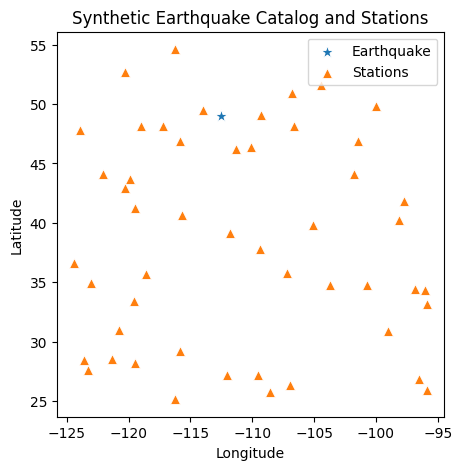

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=earthquakes, x='Longitude', y='Latitude', marker='*', s=100, label='Earthquake', ax=ax)
sns.scatterplot(data=stations, x='Station_Lon', y='Station_Lat', marker='^', s=50, label='Stations', ax=ax)
ax.set_title('Synthetic Earthquake Catalog and Stations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend()
plt.show()




## Caclulating Intensity (PGA)

We assume this data as the observation data. This data will be used to conduct the inversion in further process.

In [5]:
# Define GMPE coefficients (Denhan and Small, 1971)
b1, b2, b3 = -0.2, 0.2, -1.1  # Simplified coefficients


# Compute PGA for each station-earthquake pair
pga_data = []

for _, eq in earthquakes.iterrows():
    for _, st in stations.iterrows():
        # Compute hypocentral distance
        R = np.sqrt((eq['Longitude'] - st['Station_Lon'])**2 + (eq['Latitude'] - st['Station_Lat'])**2) * 111  # Approximate km
        R = np.sqrt(R**2 + eq['Depth']**2)  # Hypocentral distance

        if R < 1: R = 1  # Avoid zero or very small distances

        # Compute PGA using a simple GMPE
        log_pga = b1 + b2 * eq['Magnitude'] + b3 * np.log10(R)
        pga = 10**log_pga  # Convert back to linear scale

        pga_data.append([eq['Longitude'], eq['Latitude'], eq['Magnitude'], st['Station_Lon'], st['Station_Lat'], R, pga])

# Convert to DataFrame
pga_df = pd.DataFrame(pga_data, columns=['Eq_Lon', 'Eq_Lat', 'Magnitude', 'Station_Lon', 'Station_Lat', 'Distance_km', 'PGA_g'])

# Display first few rows
pga_df.head()





,Eq_Lon,Eq_Lat,Magnitude,Station_Lon,Station_Lat,Distance_km,PGA_g
0,-112.509198,49.014286,6.496646,-120.319441,42.936999,1098.586229,0.005681
1,-112.509198,49.014286,6.496646,-120.320164,52.656227,956.763732,0.006614
2,-112.509198,49.014286,6.496646,-123.257492,27.654775,2654.212314,0.002153
3,-112.509198,49.014286,6.496646,-99.014716,30.879486,2509.171511,0.002290
4,-112.509198,49.014286,6.496646,-106.966550,26.356819,2589.186542,0.002212


## Estimating (Adjusting) Coefficient of GMPE

### Least Square Method

The linear least-square method is used to adjust the coefficient of GMPE. In this case, we have to make sure that the GMPE is the linear function. In general, the least-square has the form $d = mG$, where $d$ is an observation data, $m$ is a model parameter that should we expect, and $G$ is a kernel matrix. The kernel matrix can be defined as the mathematical expresion to solve the model parameter that has size of $i x j$, where $i$ is a number of rows and $j$ is a number of columns. That means, we can solve a problem from a number of same equations $i$ and a number of variables $j$. The final equation to estimate the model $m$ can be written

$m = [G^T G]^{-1} G^Td$

We can use the least-square method from Numpy library as follow.


In [6]:
# Extract independent variables
M = pga_df['Magnitude']  # Magnitude
R = pga_df['Distance_km']  # Distance
Y = pga_df['PGA_g']  # Ground Motion


# Apply natural logarithm to Y to linearize the equation
ln_Y = np.log(Y)

# Construct the design matrix G
G = np.column_stack((np.ones_like(M), M, np.log(R)))

# Solve for the coefficients using least squares
m, _, _, _ = np.linalg.lstsq(G, ln_Y, rcond=None)

# Print results
b1, b2, b3 = m
print(f"Estimated GMPE Coefficients:\nb1 = {b1:.4f}, b2 = {b2:.4f}, b3 = {b3:.4f}")

Estimated GMPE Coefficients:
b1 = 0.0586, b2 = 0.3806, b3 = -1.1000


We have just obtained the coefficient (model) of the GMPE. This porcess has be done only single iteration. We should check the accuracy of these coefficient by comparing the obaservation PGA with the predicted PGA. We use these coefficient to calculate the PGA.

In [7]:
# Compute PGA using a simple GMPE
log_pga = b1 + b2 * pga_df['Magnitude'] + b3 * np.log10(pga_df['Distance_km'])
pga_update = 10**log_pga  # Convert back to linear scale

pga_df['PGA_g_update'] = pga_update

# Calculatitng the Mean Square Error and Root Mean Square Error
mse = mean_squared_error(pga_df['PGA_g'], pga_df['PGA_g_update'])
rmse = root_mean_squared_error(pga_df['PGA_g'], pga_df['PGA_g_update'])
mae = mean_absolute_error(pga_df['PGA_g'], pga_df['PGA_g_update'])
mape = np.mean(np.abs((pga_df['PGA_g'] - pga_df['PGA_g_update']) / pga_df['PGA_g'])) * 100

print(f"Mean Square Error (MSE): {mse:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f} %")

Mean Square Error (MSE): 0.0585
Root Mean Square Error (RMSE): 0.2419
Mean Absolute Error (MAE): 0.1614
Mean Absolute Percentage Error (MAPE): 2603.7709 %


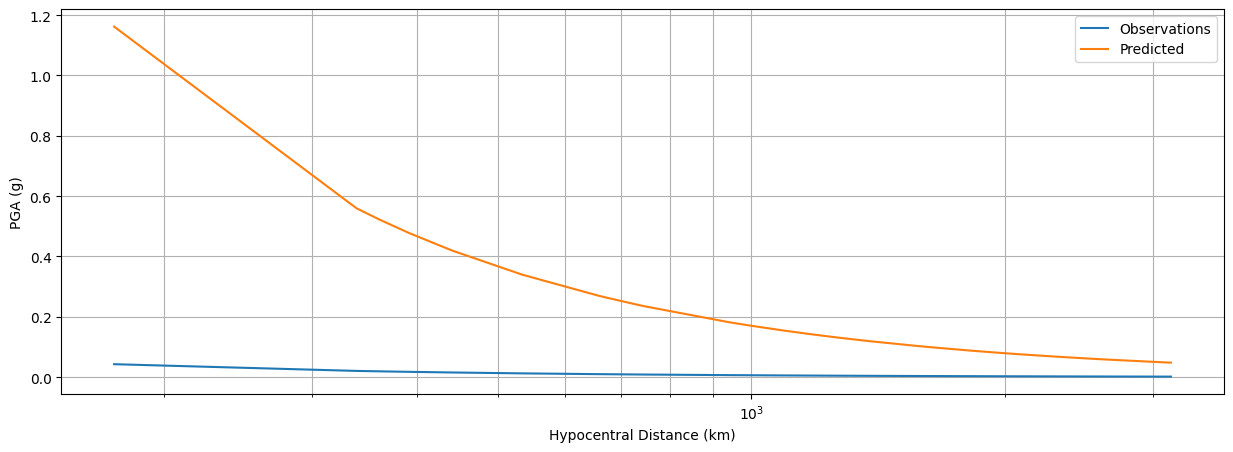

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=pga_df, x='Distance_km', y='PGA_g', label='Observations')
sns.lineplot(data=pga_df, x='Distance_km', y='PGA_g_update', label='Predicted')

ax.set_xlabel('Hypocentral Distance (km)')
ax.set_ylabel('PGA (g)')
plt.xscale('log')
plt.grid(which='both')
ax.set_axisbelow(True)
plt.show()

The statistic metrics give the MAPE with high percantage, exceed more than 1000%. As we can see on the Figure above, the graphic between observation (blue) and predicted (orange) PGA has huge discrepancy. This means, the current coefficients are not suitible yet for the GMPE. This should be solved by iteration. The iteration will find the best coefficient parameters when the minimum error limit is approached. To update the model parameter $m$ for each iteration, we can use the [gradient descent](https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/) approach, where the cost function of gradient descent can be written as follow

$\frac {δJ}{\delta m} = - \frac {2}{n} Σ_{i=1}^n x_i (y^{obs}_i - y^{pred}_i$)

$m = m - \alpha \frac {\delta J} {\delta m}$

The $\alpha$ is learning rate and can be adjusted (e.g, 0.01), more smaller more precise of the estimation and it will take high computation demand. In the following example, the minimum error is adjusted to 1%.

### Iterative Least Square Method

In [9]:
error_limit = 1 # %
learning_rate = 1E-2
i = 1

# Extract independent variables
M = pga_df['Magnitude']  # Magnitude
R = pga_df['Distance_km']  # Distance
Y = pga_df['PGA_g']  # Ground Motion

ndata = pga_df.shape[0]
mapes = []

# Apply natural logarithm to Y to linearize the equation
ln_Y = np.log(Y)

# Construct the design matrix G
G = np.column_stack((np.ones_like(M), M, np.log(R)))

# Solve for the coefficients using least squares
m, _, _, _ = np.linalg.lstsq(G, ln_Y, rcond=None)

# Print results
b1, b2, b3 = m

# Compute PGA using a simple GMPE
log_pga = b1 + b2 * pga_df['Magnitude'] + b3 * np.log10(pga_df['Distance_km'])
pga_update = 10**log_pga  # Convert back to linear scale

pga_df['PGA_g_update'] = pga_update

# Calculatitng the Mean Square Error and Root Mean Square Error
mse = mean_squared_error(pga_df['PGA_g'], pga_df['PGA_g_update'])
rmse = root_mean_squared_error(pga_df['PGA_g'], pga_df['PGA_g_update'])
mae = mean_absolute_error(pga_df['PGA_g'], pga_df['PGA_g_update'])
mape = np.mean(np.abs((pga_df['PGA_g'] - pga_df['PGA_g_update']) / pga_df['PGA_g'])) * 100
mapes.append(mape)

while mape > error_limit:

  # Calculating residual between observation data and predicted data
  residual = pga_df['PGA_g'] - pga_df['PGA_g_update']

  # updating new parameter models using gradient descent
  m = m + (learning_rate * 2/ndata * np.dot(G.T, residual))

  # extracting the parameter models
  b1, b2, b3 = m

  # Compute PGA using a simple GMPE
  log_pga = b1 + b2 * pga_df['Magnitude'] + b3 * np.log10(pga_df['Distance_km'])
  pga_update = 10**log_pga  # Convert back to linear scale

  pga_df['PGA_g_update'] = pga_update

  # Calculatitng the Mean Square Error and Root Mean Square Error
  mse = mean_squared_error(pga_df['PGA_g'], pga_df['PGA_g_update'])
  rmse = root_mean_squared_error(pga_df['PGA_g'], pga_df['PGA_g_update'])
  mae = mean_absolute_error(pga_df['PGA_g'], pga_df['PGA_g_update'])
  mape = np.mean(np.abs((pga_df['PGA_g'] - pga_df['PGA_g_update']) / pga_df['PGA_g'])) * 100
  mapes.append(mape)

  i += 1

print(f"Number of Iterations: {i}")
print(f"Mean Square Error (MSE): {mse:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f} %")

Number of Iterations: 40153
Mean Square Error (MSE): 0.0000
Root Mean Square Error (RMSE): 0.0001
Mean Absolute Error (MAE): 0.0001
Mean Absolute Percentage Error (MAPE): 1.0000 %


In [10]:
print(f"The Estimated Coefficients: b1: {b1:.2f}, b2: {b2:.2f}, b3: {b3:.2f}")

The Estimated Coefficients: b1: 0.03, b2: 0.17, b3: -1.11


In [11]:
iterations = np.arange(0,i)
error_df = pd.DataFrame({'Iteration': iterations, 'MAPE': mapes})

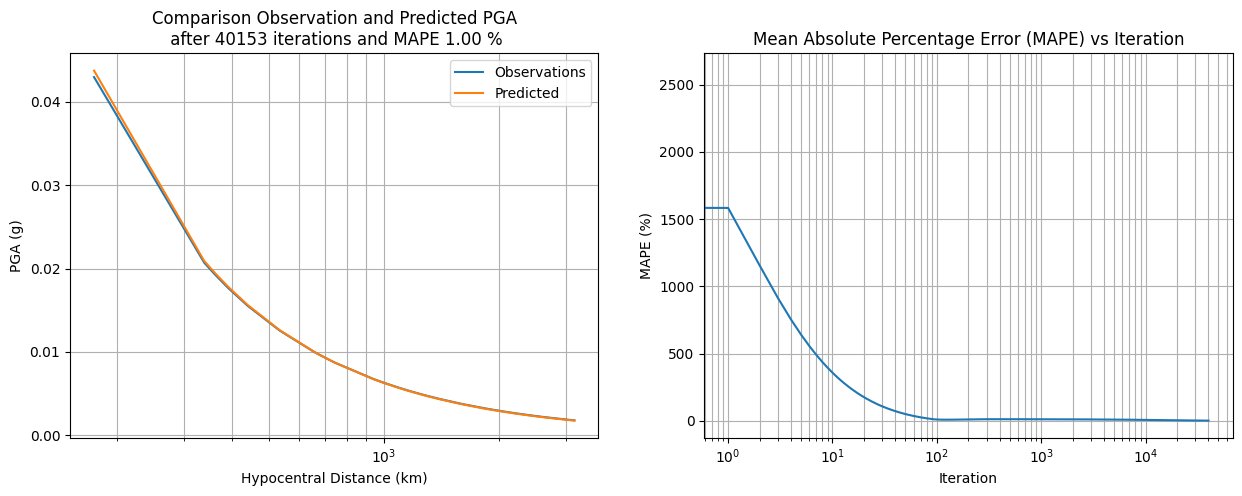

In [12]:
fig, ax = plt.subplots(figsize=(15,5), ncols=2)
sns.lineplot(data=pga_df, x='Distance_km', y='PGA_g', label='Observations', ax=ax[0])
sns.lineplot(data=pga_df, x='Distance_km', y='PGA_g_update', label='Predicted', ax=ax[0])

ax[0].set_title(f'Comparison Observation and Predicted PGA\n after {i} iterations and MAPE {mape:.2f} %')
ax[0].set_xlabel('Hypocentral Distance (km)')
ax[0].set_ylabel('PGA (g)')
ax[0].set_xscale('log')
ax[0].grid(which='both')
ax[0].set_axisbelow(True)

sns.lineplot(data=error_df, x='Iteration', y='MAPE', ax=ax[1])
ax[1].set_title('Mean Absolute Percentage Error (MAPE) vs Iteration')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('MAPE (%)')
ax[1].grid(which='both')
ax[1].set_axisbelow(True)
ax[1].set_xscale('log')
plt.show()

The new coefficient give the $b1: 0.02$, $b2:0.17$, $b3:-1.11$ where the mean absolute percentage error of 1% relative to the observation data after 40153 iterations.

I hope the explanation and example of this topic can solve any quriosity of you.